# Brazil eCommerce Dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#pd.options.display.max_rows = 20
import statsmodels.api as sm
plt.style.use('fivethirtyeight')
%matplotlib inline

In [2]:
#import os
#import conda

#conda_file_dir = conda.__file__
#conda_dir = conda_file_dir.split('lib')[0]
#proj_lib = os.path.join(os.path.join(conda_dir, 'share'), 'proj')
#os.environ["PROJ_LIB"] = proj_lib

#from mpl_toolkits.basemap import Basemap

In [3]:
# Run below line the in the command line to install basemap
# conda install -c conda-forge basemap

## Goal is to conduct an EDA of the dataset to provide insights/trends

### Data Schema:

<img src="Data_Schema.png"></img>

### First we will need to join the orders_items_dataset and orders_dataset to get retail cost plus the order date. 

In [4]:
orders = pd.read_csv("olist_orders_dataset.csv")

In [5]:
orders.dtypes

order_id                         object
customer_id                      object
order_status                     object
order_purchase_timestamp         object
order_approved_at                object
order_delivered_carrier_date     object
order_delivered_customer_date    object
order_estimated_delivery_date    object
dtype: object

In [6]:
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])
orders['order_delivered_carrier_date'] = pd.to_datetime(orders['order_delivered_carrier_date'])
orders['order_delivered_customer_date'] = pd.to_datetime(orders['order_delivered_customer_date'])
orders['order_estimated_delivery_date'] = pd.to_datetime(orders['order_estimated_delivery_date'])

In [7]:
orders.dtypes

order_id                                 object
customer_id                              object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_approved_at                        object
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
dtype: object

In [8]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26


In [9]:
print(orders['order_purchase_timestamp'].describe())
print(orders['order_purchase_timestamp'].min())
print(orders['order_purchase_timestamp'].max())

count                   99441
unique                  98875
top       2018-03-31 15:08:21
freq                        3
first     2016-09-04 21:15:19
last      2018-10-17 17:30:18
Name: order_purchase_timestamp, dtype: object
2016-09-04 21:15:19
2018-10-17 17:30:18


### EDA - Exploratory Data Analysis

* Orders by DoW
* Orders by Time of Day
* Orders by Weekday vs Weekend
* Orders by Month (seasonal?)

In [10]:
dow_df = orders.loc[:,['order_id','order_purchase_timestamp']]

In [11]:
dow_df.head()

,order_id,order_purchase_timestamp
0,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02 10:56:33
1,53cdb2fc8bc7dce0b6741e2150273451,2018-07-24 20:41:37
2,47770eb9100c2d0c44946d9cf07ec65d,2018-08-08 08:38:49
3,949d5b44dbf5de918fe9c16f97b45f8a,2017-11-18 19:28:06
4,ad21c59c0840e6cb83a9ceb5573f8159,2018-02-13 21:18:39


In [12]:
dow_df['dow'] = dow_df['order_purchase_timestamp'].dt.dayofweek
dow_df['hour_of_day'] = dow_df['order_purchase_timestamp'].dt.hour
dow_df['year'] = dow_df['order_purchase_timestamp'].dt.year
dow_df['month'] = dow_df['order_purchase_timestamp'].dt.month
dow_df['qtr'] = dow_df['order_purchase_timestamp'].dt.quarter

In [13]:
#The day of the week with Monday=0, Sunday=6.
dow_df.head()

,order_id,order_purchase_timestamp,dow,hour_of_day,year,month,qtr
0,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02 10:56:33,0,10,2017,10,4
1,53cdb2fc8bc7dce0b6741e2150273451,2018-07-24 20:41:37,1,20,2018,7,3
2,47770eb9100c2d0c44946d9cf07ec65d,2018-08-08 08:38:49,2,8,2018,8,3
3,949d5b44dbf5de918fe9c16f97b45f8a,2017-11-18 19:28:06,5,19,2017,11,4
4,ad21c59c0840e6cb83a9ceb5573f8159,2018-02-13 21:18:39,1,21,2018,2,1


In [14]:
dow_cnt = dow_df.groupby('dow')['order_id'].count()

In [15]:
dow_cnt = pd.DataFrame(dow_cnt).reset_index()

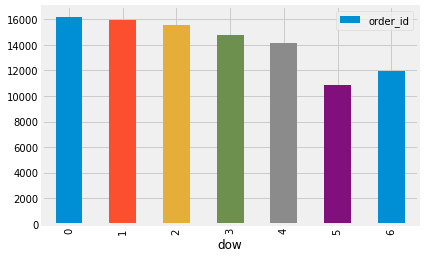

In [17]:
dow_cnt.plot.bar(x='dow', y='order_id')

In [18]:
# count by dow, year, month, qtr
dow_df.columns

Index(['order_id', 'order_purchase_timestamp', 'dow', 'hour_of_day', 'year',
       'month', 'qtr'],
      dtype='object')

<Figure size 360x864 with 0 Axes>

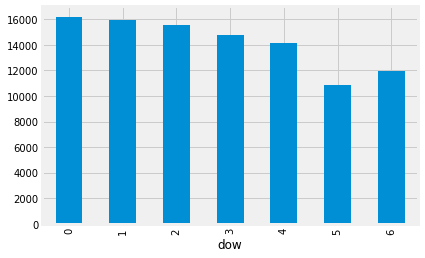

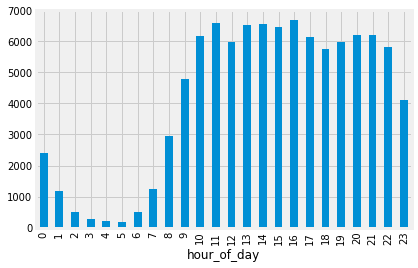

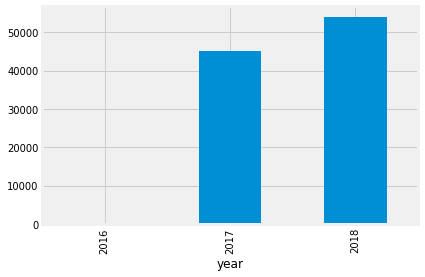

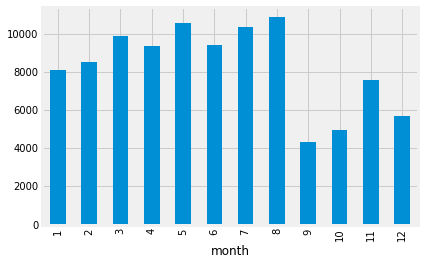

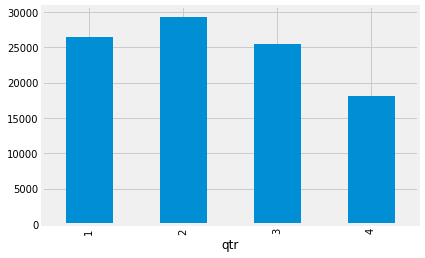

In [19]:
time_list = list(dow_df.columns[2:])
fig = plt.figure(figsize=(5,12))
for i in range(0,5):
    ax = pd.pivot_table(dow_df, index = time_list[i] ,values='order_id', 
                        aggfunc=['count']).plot(kind= 'bar',legend=False)

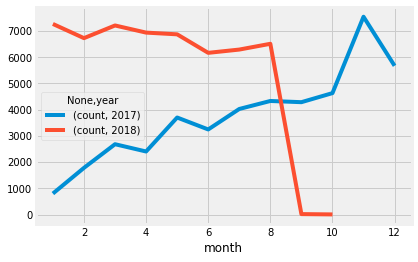

In [20]:
year_chart = pd.pivot_table(dow_df.loc[dow_df['year'] != 2016], index= 'month', columns='year', values='order_id', aggfunc=['count'])
year_chart.plot()

#fig = plt.figure(figsize=(12, 5))


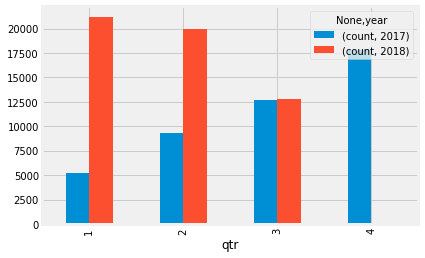

In [21]:
year_chart = pd.pivot_table(dow_df.loc[dow_df['year'] != 2016], index= 'qtr', columns='year', values='order_id', aggfunc=['count'])
year_chart.plot(kind= 'bar')


In [22]:
#https://www.dataquest.io/blog/pandas-pivot-table/
pd.pivot_table(dow_df, columns= 'dow' ,values='order_id', aggfunc=['count'])

count                                          
dow           0      1      2      3      4      5      6
order_id  16196  15963  15552  14761  14122  10887  11960

In [23]:
day_heat_map = pd.pivot_table(dow_df, index= 'dow',columns='hour_of_day'  ,values='order_id', aggfunc=['count'])
day_heat_map

count                                         ...               \
hour_of_day    0    1   2   3   4   5   6    7    8    9  ...     14    15   
dow                                                       ...                
0             328  134  66  36  21  22  69  160  479  783 ...   1096  1079   
1             306  158  80  28  29  24  71  223  522  864 ...   1124  1047   
2             397  179  81  33  33  27  93  211  517  829 ...   1050   983   
3             355  167  75  39  31  28  85  220  502  758 ...    977   928   
4             426  216  72  49  40  36  97  206  493  768 ...    961   979   
5             315  175  67  43  25  24  53  106  249  434 ...    677   722   
6             267  141  69  44  27  27  34  105  205  349 ...    684   716   

                                                        
hour_of_day    16   17   18   19    20    21   22   23  
dow                                                     
0            1094  992  928  945  1027  1118  991  717  
1            1081  967  877  924   988  1027  965  692  
2            1040  967  852  848   904   963  878  615  
3            1077  909  784  826   839   840  857  551  
4             974  817  723  784   738   726  702  512  
5             697  701  710  756   730   654  550  429  
6             712  797  895  899   967   889  873  607  

[7 rows x 24 columns]

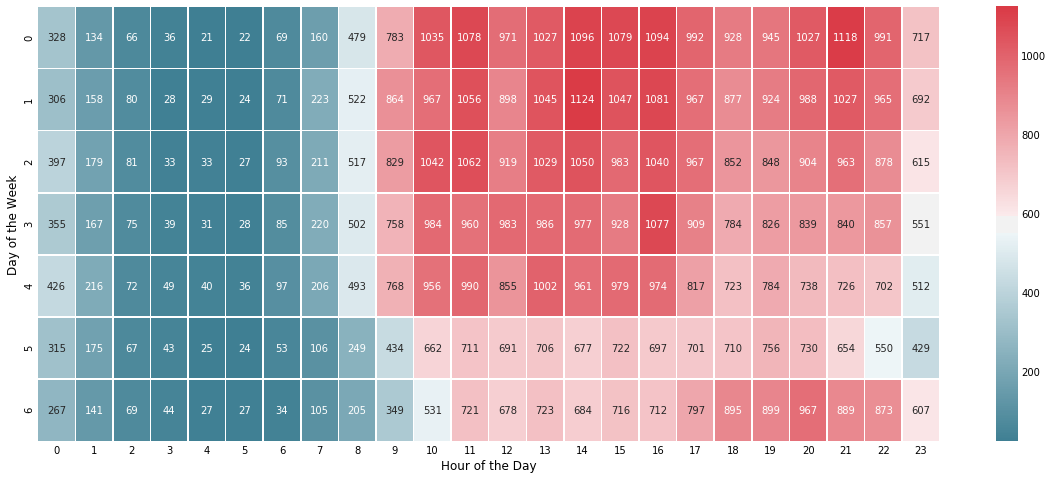

In [24]:
fig = plt.figure(figsize=(18,8))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(day_heat_map,annot=True, fmt="1", linewidths=.5,cmap=cmap,xticklabels=range(0,24))
plt.xlabel("Hour of the Day")
plt.ylabel("Day of the Week")
plt.show()

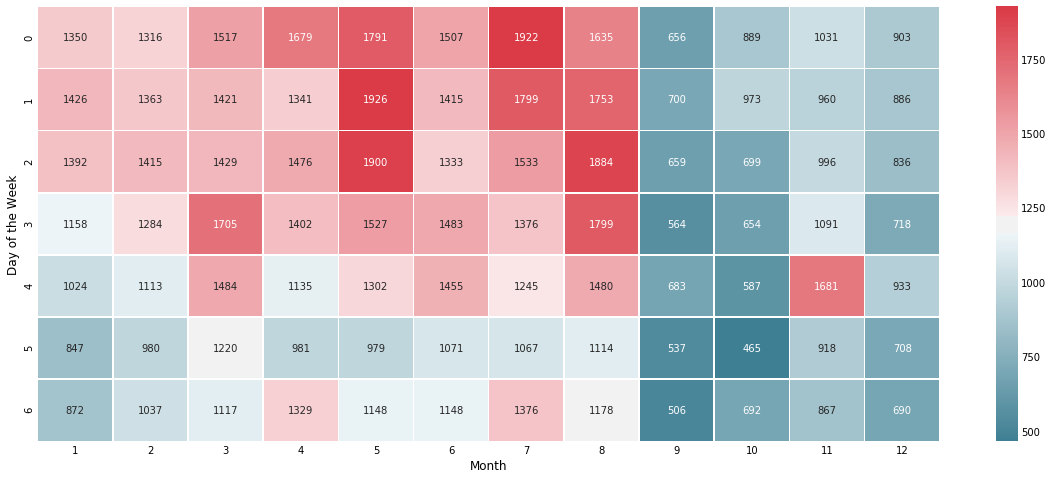

In [25]:
month_heat_map = pd.pivot_table(dow_df, index= 'dow',columns='month',values='order_id', aggfunc=['count'])
month_heat_map

fig = plt.figure(figsize=(18,8))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(month_heat_map,annot=True, fmt="1", linewidths=.5,cmap=cmap,xticklabels=range(1,13))
plt.xlabel("Month")
plt.ylabel("Day of the Week")
plt.show()